### Bagging 기법
    - RandomForest는 Bagging 방식을 적용한 알고리즘이다.
    - Bagging방식으로 각자 데이터를 샘플링해서 개별적으로 학습한 후 최종적으로 투표를 통해 가장 보편적인 예측결정을 하게 됨.
    
    - Bagging == Bootstrap Aggregation
    - 사이킷런은 RandomForestClassifier 클래스를 토해 랜덤 포레스트 기반의 분류를 지원함

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [9]:
iris = datasets.load_iris()

In [16]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,stratify=iris.target,random_state=0)

#### RandomForest Model Generator 

In [11]:
'''
n_estimator가 가장 중요한 hyperparameter
=100? decision Tree(estimator) 100개 나옴
100개의 평가자들의 평균, 다수결의 원칙을 예측 결과로 내놓을 것.
'''
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Model Accuracy 측정하기
    1. 직접 측정하기
    2. 사용자 함수 정의해서 측정하기
    3. 라이브러리 이용해서 측정하기 score(),accuracy_score()
    4. Confusion Metrix

In [18]:
#1.
pred = rf.predict(X_test)
print(pred)

print(y_test)

[0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]
[0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


In [19]:
#2개의 리스크 값을 병행해서 살펴볼 때.. zip()
y_tuple = list(zip(y_test,pred))
y_tuple

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2)]

In [20]:
#2.
for a,b in y_tuple:
    if not a==b:
        print('unmatched : (y_test,pred)=(',a,',',b,')')

In [21]:
#3.accuracy_score
from sklearn.metrics import accuracy_score

In [23]:
accuracy = accuracy_score(y_test,pred)
accuracy

1.0

#### Confusion Matrix
    - 어떤 클래스를 어떻게 혼동했는지 보여주는 것

In [24]:
#sample data로 confusion Matrix 실습
from sklearn.metrics import confusion_matrix

In [25]:
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

confusion_matrix(y_true,y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

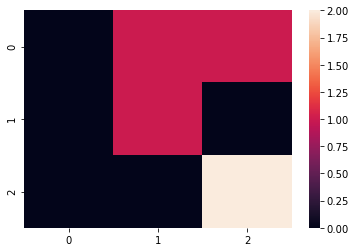

In [28]:
a =['cherry','apple','apple','banana','cherry']
b = ['banana','apple','apple','banana','apple']

cfs=confusion_matrix(a,b,labels=['cherry','banana','apple'])
sns.heatmap(cfs)